In [44]:
import numpy as np
import pandas as pd
import math
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [45]:
# Path to the futures data file
futures_file_path = r"C:\Users\Acer\Downloads\BANKNIFTY_FNO_Data_2017_New\BANKNIFTY_FNO_Data_2017\BANKNIFTY_2017_FUTURES.csv"

# Load futures data and filter for contract type 'I'
futures = pd.read_csv(futures_file_path)
futures = futures[futures['Contract'] == 'I']

In [46]:
# Display the first few rows of futures data
futures.head()

,Ticker,Date,Time,Open,High,Low,Close,Volume,OI,Contract,Expiry
0,BANKNIFTY-I.NFO,2017-01-02,09:15:59,18210.05,18261.20,18210.00,18213.85,47680.0,2035880.0,I,2017-01-25
2,BANKNIFTY-I.NFO,2017-01-02,09:16:59,18213.35,18222.15,18213.35,18221.90,24120.0,2060560.0,I,2017-01-25
6,BANKNIFTY-I.NFO,2017-01-02,09:17:59,18221.85,18221.85,18156.15,18157.30,34440.0,2060560.0,I,2017-01-25
9,BANKNIFTY-I.NFO,2017-01-02,09:18:59,18160.00,18171.80,18143.00,18171.80,34080.0,2060560.0,I,2017-01-25
10,BANKNIFTY-I.NFO,2017-01-02,09:19:59,18171.90,18177.40,18153.50,18159.00,16600.0,2086360.0,I,2017-01-25


In [47]:
futures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92723 entries, 0 to 175523
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ticker    92723 non-null  object 
 1   Date      92723 non-null  object 
 2   Time      92723 non-null  object 
 3   Open      92723 non-null  float64
 4   High      92723 non-null  float64
 5   Low       92723 non-null  float64
 6   Close     92723 non-null  float64
 7   Volume    92723 non-null  float64
 8   OI        92723 non-null  float64
 9   Contract  92723 non-null  object 
 10  Expiry    92723 non-null  object 
dtypes: float64(6), object(5)
memory usage: 8.5+ MB


In [48]:
# Path to the options data file
options_file_path = r"C:\Users\Acer\Downloads\BANKNIFTY_FNO_Data_2017_New\BANKNIFTY_FNO_Data_2017\BANKNIFTY_2017_OPTIONS.csv"

# Load options data and filter for contract type 'I'
options = pd.read_csv(options_file_path)
options = options[options['Contract_Weekly'] == 'I']

In [49]:
# Display options data for a specific date and time, type CE (Call Option)
options[(options['Type'] == 'CE') & (options['Date'] == '2017-01-02') & (options['Time'] == '09:15:59')]

,Ticker,Date,Time,Open,High,Low,Close,Volume,OI,Type,Strike,Expiry,Contract_Monthly,Contract_Weekly
1,BANKNIFTY05JAN1718900CE.NFO,2017-01-02,09:15:59,7.00,12.00,5.75,5.80,2360.0,37160.0,CE,18900.0,2017-01-05,W,I
2,BANKNIFTY05JAN1719000CE.NFO,2017-01-02,09:15:59,4.40,6.60,4.15,4.20,5680.0,120760.0,CE,19000.0,2017-01-05,W,I
3,BANKNIFTY05JAN1719100CE.NFO,2017-01-02,09:15:59,3.00,3.00,3.00,3.00,160.0,9960.0,CE,19100.0,2017-01-05,W,I
4,BANKNIFTY05JAN1719500CE.NFO,2017-01-02,09:15:59,1.50,1.50,1.50,1.50,80.0,24160.0,CE,19500.0,2017-01-05,W,I
24,BANKNIFTY05JAN1718800CE.NFO,2017-01-02,09:15:59,11.35,13.90,8.75,9.20,5480.0,104640.0,CE,18800.0,2017-01-05,W,I
25,BANKNIFTY05JAN1718700CE.NFO,2017-01-02,09:15:59,17.00,19.60,13.30,14.30,12480.0,135560.0,CE,18700.0,2017-01-05,W,I
33,BANKNIFTY05JAN1717500CE.NFO,2017-01-02,09:15:59,672.05,672.05,672.05,672.05,40.0,13200.0,CE,17500.0,2017-01-05,W,I
34,BANKNIFTY05JAN1718600CE.NFO,2017-01-02,09:15:59,23.25,28.85,20.40,22.45,15840.0,160960.0,CE,18600.0,2017-01-05,W,I
35,BANKNIFTY05JAN1717600CE.NFO,2017-01-02,09:15:59,550.00,550.00,550.00,550.00,40.0,3440.0,CE,17600.0,2017-01-05,W,I
39,BANKNIFTY05JAN1717900CE.NFO,2017-01-02,09:15:59,300.00,319.40,300.00,319.40,80.0,27840.0,CE,17900.0,2017-01-05,W,I


In [50]:
options.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2576856 entries, 1 to 5283596
Data columns (total 14 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Ticker            object 
 1   Date              object 
 2   Time              object 
 3   Open              float64
 4   High              float64
 5   Low               float64
 6   Close             float64
 7   Volume            float64
 8   OI                float64
 9   Type              object 
 10  Strike            float64
 11  Expiry            object 
 12  Contract_Monthly  object 
 13  Contract_Weekly   object 
dtypes: float64(7), object(7)
memory usage: 294.9+ MB


In [51]:
import pandas as pd
import math
from datetime import datetime, timedelta

# Define the trade report DataFrame
trade_report_columns = [
    'date', 'strike price', 'call atm entry price', 'put atm entry price',
    'call otm entry price', 'put otm entry price', 'call atm exit price',
    'put atm exit price', 'call otm exit price', 'put otm exit price',
    'time of exit', 'profit', 'roi'
]

trade_report = pd.DataFrame(columns=trade_report_columns)

save_dir = 'results'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Sample data for demo purposes (you should use your actual trade data)
start_date_str = '2017-01-02'
end_date_str = '2017-12-29'
start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
end_date = datetime.strptime(end_date_str, '%Y-%m-%d')
current_date = start_date

while current_date <= end_date:
    formatted_date = current_date.strftime('%Y-%m-%d')
    futureprice = futures[(futures['Date'] == formatted_date) & (futures['Time'] == '10:30:59')]
    if futureprice.empty:
        print(f"{formatted_date} is a Holiday")
    else:
        strikeprice = round(futureprice.iloc[0]['Open'] / 100) * 100.0
        twopercent = math.floor(0.015 * strikeprice / 100) * 100
        df = options[options['Date'] == formatted_date]
        callatm, putatm, callotm, putotm = -1, -1, -1, -1
        
        # Get entry prices
        callatm_df = df[(df['Time'] == '10:30:59') & (df['Type'] == 'CE') & (df['Strike'] == strikeprice)]
        putatm_df = df[(df['Time'] == '10:30:59') & (df['Type'] == 'PE') & (df['Strike'] == strikeprice)]
        callotm_df = df[(df['Time'] == '10:30:59') & (df['Type'] == 'CE') & (df['Strike'] == strikeprice + twopercent)]
        putotm_df = df[(df['Time'] == '10:30:59') & (df['Type'] == 'PE') & (df['Strike'] == strikeprice - twopercent)]
        
        if not callatm_df.empty:
            callatm = callatm_df.iloc[0]['Open']
        if not putatm_df.empty:
            putatm = putatm_df.iloc[0]['Open']
        if not callotm_df.empty:
            callotm = callotm_df.iloc[0]['Open']
        if not putotm_df.empty:
            putotm = putotm_df.iloc[0]['Open']

        print(f"Date: {formatted_date}, Strike Price: {strikeprice}")
        print(f"Call ATM Entry Price: {callatm}, Put ATM Entry Price: {putatm}")
        print(f"Call OTM Entry Price: {callotm}, Put OTM Entry Price: {putotm}")

        stoploss = 0.3 * (callatm + putatm)
        target = 0.8 * (callatm + putatm)
        start_time = datetime.strptime('10:39:59', '%H:%M:%S')
        end_time = datetime.strptime('15:20:19', '%H:%M:%S')
        current_time = start_time
        check = 1
        
        while current_time < end_time:
            formatted_time = current_time.strftime('%H:%M:%S')
            callatmexit = putatmexit = callotmexit = putotmexit = -1
            callatmexit_df = df[(df['Time'] == formatted_time) & (df['Type'] == 'CE') & (df['Strike'] == strikeprice)]
            putatmexit_df = df[(df['Time'] == formatted_time) & (df['Type'] == 'PE') & (df['Strike'] == strikeprice)]
            callotmexit_df = df[(df['Time'] == formatted_time) & (df['Type'] == 'CE') & (df['Strike'] == strikeprice + twopercent)]
            putotmexit_df = df[(df['Time'] == formatted_time) & (df['Type'] == 'PE') & (df['Strike'] == strikeprice - twopercent)]
            
            if not callatmexit_df.empty:
                callatmexit = callatmexit_df.iloc[0]['Open']
            if not putatmexit_df.empty:
                putatmexit = putatmexit_df.iloc[0]['Open']
            if not callotmexit_df.empty:
                callotmexit = callotmexit_df.iloc[0]['Open']
            if not putotmexit_df.empty:
                putotmexit = putotmexit_df.iloc[0]['Open']
            
            if (callatmexit == -1 or putatmexit == -1 or callotmexit == -1 or putotmexit == -1):
                check = 1
            elif ((callatm + putatm - callotm - putotm) - (callatmexit + putatmexit - callotmexit - putotmexit) >= target):
                check = 0
                profit = callatm + putatm + callotmexit + putotmexit - callotm - putotm - callatmexit - putatmexit
                trade_report.loc[len(trade_report.index)] = [
                    formatted_date, strikeprice, callatm, putatm, callotm, putotm,
                    callatmexit, putatmexit, callotmexit, putotmexit, formatted_time, profit, profit * 100 / (callatm + putatm)
                ]
                print(f"Target Hit: Exit Time: {formatted_time}, Profit: {profit}, ROI: {profit * 100 / (callatm + putatm)}")
                break
            elif ((callatmexit + putatmexit - callotmexit - putotmexit) - (callatm + putatm - callotm - putotm) >= stoploss):
                check = 0
                profit = callatm + putatm + callotmexit + putotmexit - callotm - putotm - callatmexit - putatmexit
                trade_report.loc[len(trade_report.index)] = [
                    formatted_date, strikeprice, callatm, putatm, callotm, putotm,
                    callatmexit, putatmexit, callotmexit, putotmexit, formatted_time, profit, profit * 100 / (callatm + putatm)
                ]
                print(f"Stop Loss Hit: Exit Time: {formatted_time}, Profit: {profit}, ROI: {profit * 100 / (callatm + putatm)}")
                break
            current_time += timedelta(minutes=1)
        
        formatted_time = current_time.strftime('%H:%M:%S')
        if check:
            if (callatmexit == -1 or putatmexit == -1 or callotmexit == -1 or putotmexit == -1):
                trade_report.loc[len(trade_report.index)] = [
                    formatted_date, strikeprice, callatm, putatm, callotm, putotm,
                    callatmexit, putatmexit, callotmexit, putotmexit, formatted_time, 0, 0
                ]
                print(f"No valid exit prices found by {formatted_time}")
            else:
                profit = callatm + putatm + callotmexit + putotmexit - callotm - putotm - callatmexit - putatmexit
                trade_report.loc[len(trade_report.index)] = [
                    formatted_date, strikeprice, callatm, putatm, callotm, putotm,
                    callatmexit, putatmexit, callotmexit, putotmexit, formatted_time, profit, profit * 100 / (callatm + putatm)
                ]
                print(f"Exit Time: {formatted_time}, Profit: {profit}, ROI: {profit * 100 / (callatm + putatm)}")
    
    current_date += timedelta(days=1)

save_path = os.path.join(save_dir, 'TradeReport.csv')
trade_report.to_csv(save_path, index=False)
print(f"Trade report saved to {save_path}")

Date: 2017-01-02, Strike Price: 18100.0
Call ATM Entry Price: 89.5, Put ATM Entry Price: 171.45
Call OTM Entry Price: 38.85, Put OTM Entry Price: 78.65
Exit Time: 15:20:59, Profit: -3.3500000000000796, ROI: -1.2837708373251886
Date: 2017-01-03, Strike Price: 18100.0
Call ATM Entry Price: 90.75, Put ATM Entry Price: 136.55
Call OTM Entry Price: 35.9, Put OTM Entry Price: 55.95
Exit Time: 15:20:59, Profit: 2.500000000000057, ROI: 1.0998680158381244
Date: 2017-01-04, Strike Price: 18000.0
Call ATM Entry Price: 94.3, Put ATM Entry Price: 82.5
Call OTM Entry Price: 29.6, Put OTM Entry Price: 23.95
Exit Time: 15:20:59, Profit: 6.400000000000034, ROI: 3.6199095022624626
Date: 2017-01-05, Strike Price: 18100.0
Call ATM Entry Price: 20.25, Put ATM Entry Price: 78.8
Call OTM Entry Price: 0.75, Put OTM Entry Price: 6.8
No valid exit prices found by 15:20:59
Date: 2017-01-06, Strike Price: 18300.0
Call ATM Entry Price: 129.0, Put ATM Entry Price: 137.0
Call OTM Entry Price: 56.15, Put OTM Entry Pr

In [52]:
# Initialize an empty DataFrame to store results
columns = ['date', 'profit', 'roi']
dtypes = {'date': 'string', 'profit': 'float', 'roi': 'float'}
results = pd.read_csv(r"results\TradeReport.csv")

In [53]:
results = results[columns]
results = results.astype(dtypes)

In [54]:
# Display the first few rows of the results DataFrame
results.head(10)

,date,profit,roi
0,2017-01-02,-3.35,-1.283771
1,2017-01-03,2.50,1.099868
2,2017-01-04,6.40,3.619910
3,2017-01-05,0.00,0.000000
4,2017-01-06,3.20,1.203008
5,2017-01-09,-0.60,-0.252154
6,2017-01-10,12.40,6.203102
7,2017-01-11,-42.95,-30.450195
8,2017-01-12,80.05,81.022267
9,2017-01-13,-5.75,-2.138341


In [55]:
# Calculate and display total profit and ROI
total_profit = results['profit'].sum()
total_roi = results['roi'].sum()

# Calculate the total number of trades
total_trades = len(results)

# Calculate the number of profitable trades
profitable_trades = len(results[results['profit'] > 0])

# Calculate the number of losing trades
losing_trades = len(results[results['profit'] < 0])

# Calculate the hit ratio (percentage of profitable trades)
hit_ratio = profitable_trades * 100 / total_trades

# Define the risk-reward ratio
risk_reward_ratio = "1:2.66"

# Calculate the average return per trade
avg_return_per_trade = results['roi'].sum() / total_trades

# Calculate the average profit per trade
avg_profit_per_trade = results[results['roi'] > 0]['roi'].sum() / total_trades

# Calculate the average loss per trade
avg_loss_per_trade = results[results['roi'] < 0]['roi'].sum() / total_trades

# Calculate the maximum profit
max_profit = results['roi'].max()

# Calculate the average return per year
avg_return_per_year = results['roi'].sum()

# Calculate the average return per month
avg_return_per_month = avg_return_per_year / 12

# Calculate the total return
total_return = results['roi'].sum()

# Calculate the Compound Annual Growth Rate (CAGR)
cagr = total_return
# Calculate the Maximum Drawdown
roi_values = results['roi'].tolist()
max_drawdown = roi_values[0]
for i in range(1, len(roi_values)):
    roi_values[i] += roi_values[i - 1]
    max_drawdown = min(max_drawdown, roi_values[i])
calmarratio = avg_return_per_year/max_drawdown

# Print the calculated results
print("Total Profit:", total_profit)
print("Total ROI:", total_roi)
print("Total Trades:", total_trades)
print("Profitable Trades:", profitable_trades)
print("Losing Trades:", losing_trades)
print("Hit Ratio:", hit_ratio)
print("Risk-Reward Ratio:", risk_reward_ratio)
print("Calmar Ratio",calmarratio)
print("Average Return Per Trade:", avg_return_per_trade)
print("Average Profit Per Trade:", avg_profit_per_trade)
print("Average Loss Per Trade:", avg_loss_per_trade)
print("Maximum Profit:", max_profit)
print("Average Return Per Year:", avg_return_per_year)
print("Average Return Per Month:", avg_return_per_month)
print("Total Return:", total_return)
print("Compound Annual Growth Rate (CAGR):", cagr)
print("Maximum Drawdown:", max_drawdown)

metrics = {
    "Metric": [
        "Total Trades",
        "Profitable Trades",
        "Losing Trades",
        "Hit Ratio",
        "Risk-Reward Ratio",
        "Calmar Ratio",
        "Total Profit",
        "Total ROI",
        "Average Return Per Trade",
        "Average Profit Per Trade",
        "Average Loss Per Trade",
        "Maximum Profit",
        "Average Return Per Year",
        "Average Return Per Month",
        "Total Return",
        "Compound Annual Growth Rate (CAGR)",
        "Maximum Drawdown"
    ],
    "Value": [
        total_trades,
        profitable_trades,
        losing_trades,
        hit_ratio,
        risk_reward_ratio,
        calmarratio,
        total_profit,
        total_roi,
        avg_return_per_trade,
        avg_profit_per_trade,
        avg_loss_per_trade,
        max_profit,
        avg_return_per_year,
        avg_return_per_month,
        total_return,
        cagr,
        max_drawdown
    ]
}
metrics_df = pd.DataFrame(metrics)
save_path = os.path.join(save_dir, 'PerformanceStats.csv')
metrics_df.to_csv(save_path, index=False)
print(f"Trade report saved to {save_path}")

Total Profit: 850.8500000000006
Total ROI: 591.5249865734386
Total Trades: 245
Profitable Trades: 141
Losing Trades: 92
Hit Ratio: 57.55102040816327
Risk-Reward Ratio: 1:2.66
Calmar Ratio -29.784393047442414
Average Return Per Trade: 2.4143877002997494
Average Profit Per Trade: 7.267205887792244
Average Loss Per Trade: -4.852818187492495
Maximum Profit: 84.92012779552715
Average Return Per Year: 591.5249865734386
Average Return Per Month: 49.29374888111988
Total Return: 591.5249865734386
Compound Annual Growth Rate (CAGR): 591.5249865734386
Maximum Drawdown: -19.860233029802593
Trade report saved to results\PerformanceStats.csv


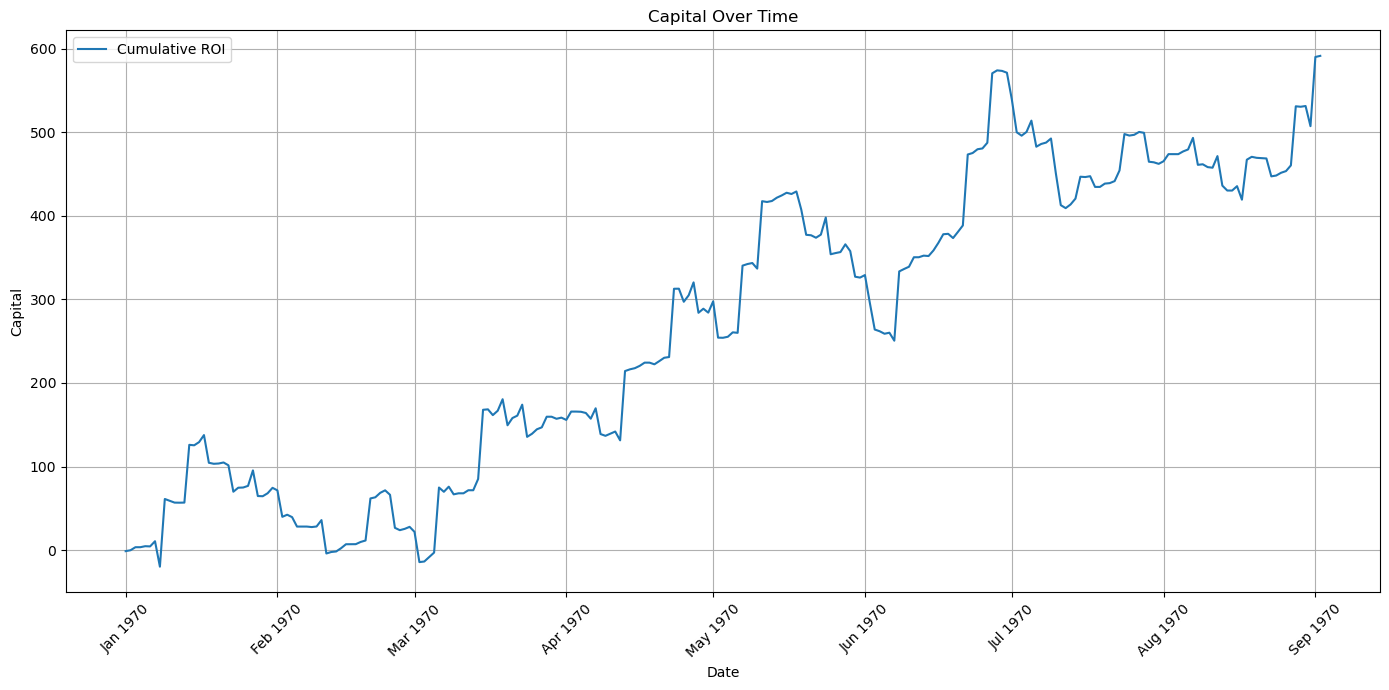

In [56]:
import matplotlib.dates as mdates

# Visualizations
plt.figure(figsize=(14, 7))
plt.plot(results['date'], results['roi'].cumsum(), label='Cumulative ROI')
plt.xlabel('Date')
plt.ylabel('Capital')
plt.title('Capital Over Time')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

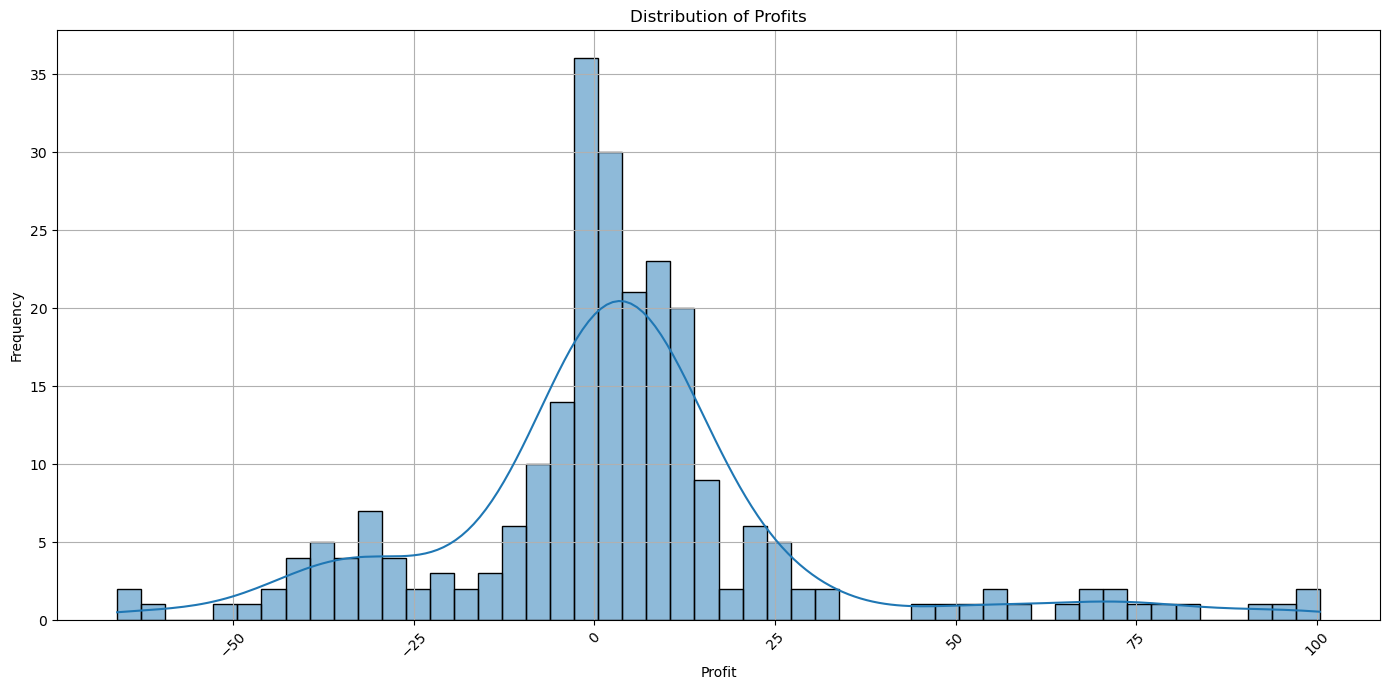

In [58]:
plt.figure(figsize=(14, 7))
sns.histplot(results['profit'], bins=50, kde=True)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profits')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

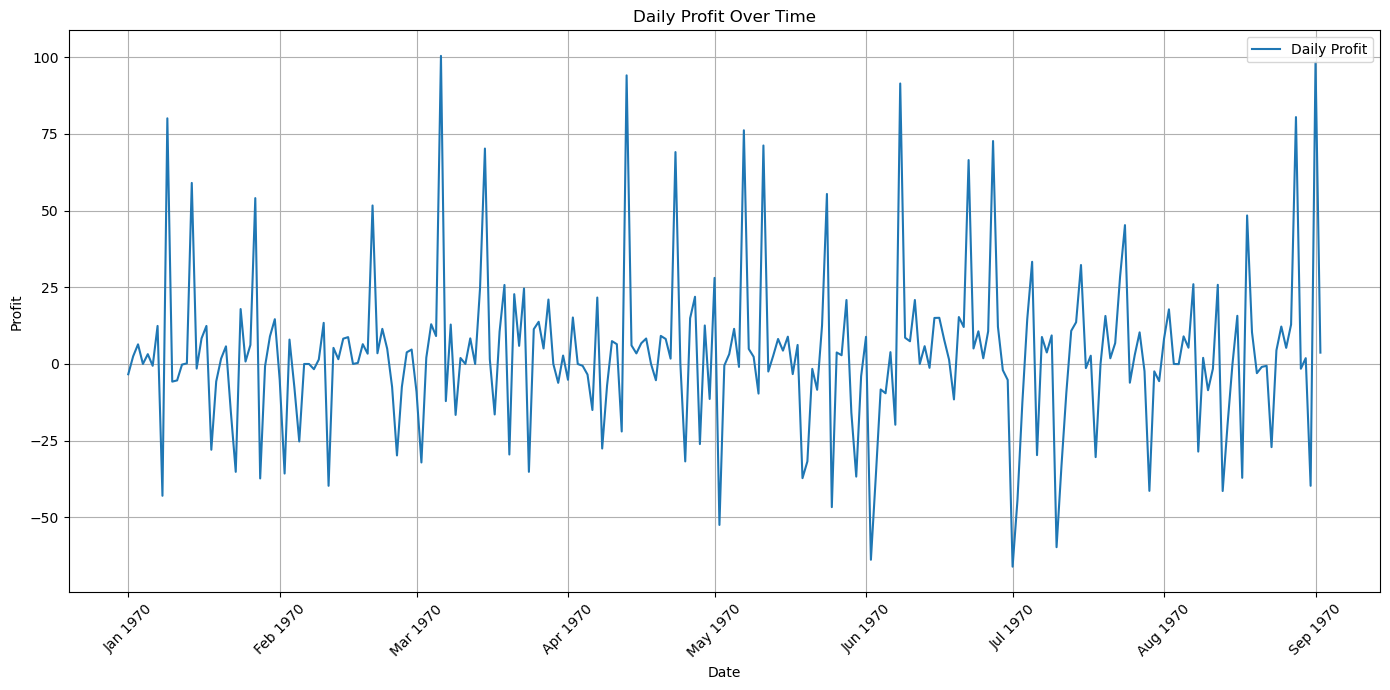

In [59]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=results, x='date', y='profit', label='Daily Profit')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Daily Profit Over Time')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

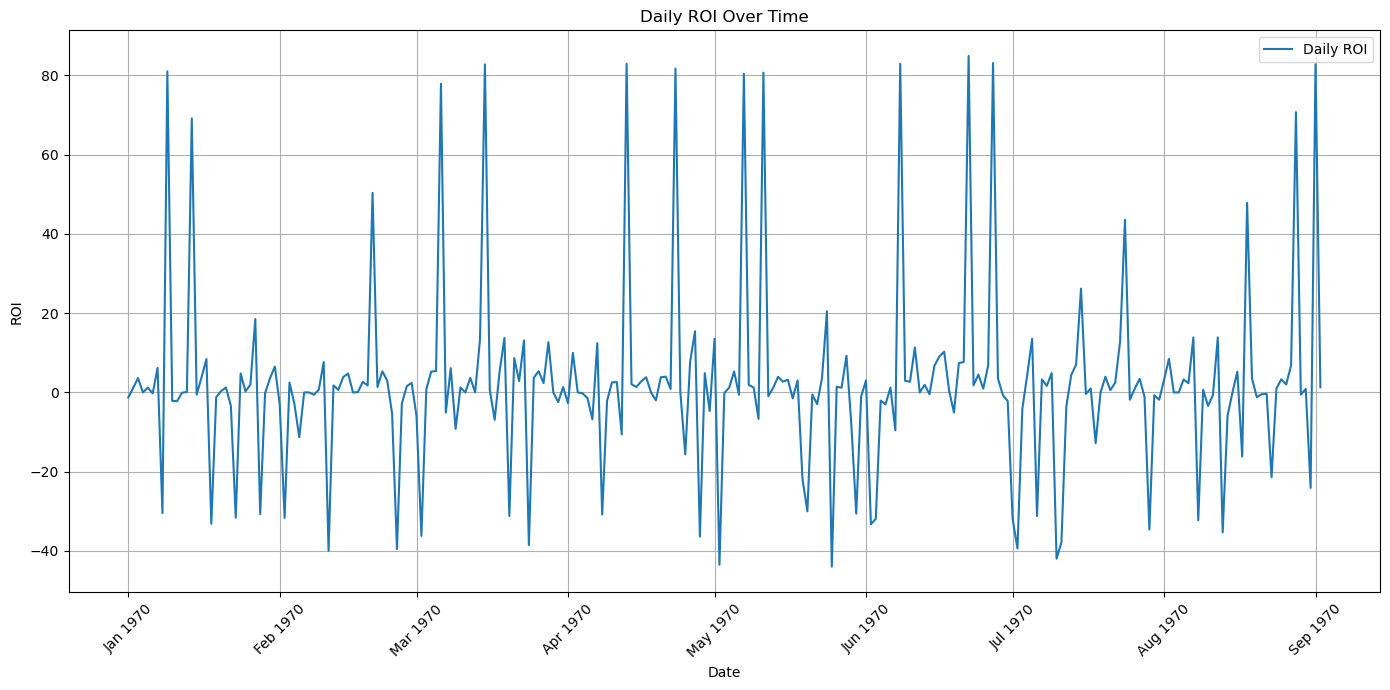

In [60]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=results, x='date', y='roi', label='Daily ROI')
plt.xlabel('Date')
plt.ylabel('ROI')
plt.title('Daily ROI Over Time')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()